In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv("/content/final_cricket_levels.csv")

# Define labels for each role based on thresholds
df["Batter"] = (df["Batting_Level"] >= 5).astype(int)
df["Bowler"] = (df["Bowling_Level"] >= 5).astype(int)
df["Fielder"] = (df["Fielding_Level"] >= 5).astype(int)
df["All-Rounder"] = ((df["Batting_Level"] >= 5) & (df["Bowling_Level"] >= 5)).astype(int)
df["Wicketkeeper"] = ((df["Batting_Level"] >= 5) & (df["Fielding_Level"] >= 5)).astype(int)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv("final_cricket_levels.csv")

# Define labels for each role based on thresholds
df["Batter"] = (df["Batting_Level"] >= 5).astype(int)
df["Bowler"] = (df["Bowling_Level"] >= 5).astype(int)
df["Fielder"] = (df["Fielding_Level"] >= 5).astype(int)
df["All-Rounder"] = ((df["Batting_Level"] >= 5) & (df["Bowling_Level"] >= 5)).astype(int)
df["Wicketkeeper"] = ((df["Batting_Level"] >= 5) & (df["Fielding_Level"] >= 5)).astype(int)

# Features for training
X = df[["Batting_Level", "Bowling_Level", "Fielding_Level"]]

# Function to train and predict with XGBoost
def train_xgboost(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Changed eval_metric to 'logloss'
    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")
    model.fit(X_train, y_train)
    preds = model.predict_proba(X)[:, 1]  # Get probability of being classified
    return model, preds

# Train classifiers
_, df["Batter_Confidence"] = train_xgboost(X, df["Batter"])
_, df["Bowler_Confidence"] = train_xgboost(X, df["Bowler"])
_, df["Fielder_Confidence"] = train_xgboost(X, df["Fielder"])
_, df["AllRounder_Confidence"] = train_xgboost(X, df["All-Rounder"])
_, df["Wicketkeeper_Confidence"] = train_xgboost(X, df["Wicketkeeper"])

# Select highest confidence role for each player
role_columns = ["Batter_Confidence", "Bowler_Confidence", "Fielder_Confidence", "AllRounder_Confidence", "Wicketkeeper_Confidence"]
df["Predicted_Role"] = df[role_columns].idxmax(axis=1).str.replace("_Confidence", "")

# Keep relevant columns
final_df = df[["Player", "Team", "Batting_Level", "Bowling_Level", "Fielding_Level", "Predicted_Role"] + role_columns]

# Save to CSV
final_df.to_csv("confidence_intervals.csv", index=False)

# Display output
final_df

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:05:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:05:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:05:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:05:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:05:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

,Player,Team,Batting_Level,Bowling_Level,Fielding_Level,Predicted_Role,Batter_Confidence,Bowler_Confidence,Fielder_Confidence,AllRounder_Confidence,Wicketkeeper_Confidence
0,Sam Sabharwal,Windsor Tigers CC,6,4,5,Fielder,0.959744,0.003056,0.966508,0.021873,0.878936
1,Imran Khan,Chatham CC,6,5,4,Bowler,0.959744,0.979086,0.004430,0.888972,0.022839
2,Rama Tarun Ganne,Windsor Royals CC,6,2,6,Fielder,0.959744,0.001836,0.966508,0.021873,0.878936
3,Sahil Sharma,Windsor Royals CC,6,5,4,Bowler,0.959744,0.979086,0.004430,0.888972,0.022839
4,Karamjit Sohal,WEUnited CC,5,6,4,Bowler,0.959744,0.979086,0.004430,0.888972,0.022839
...,...,...,...,...,...,...,...,...,...,...,...
626,Harsh Patel,Windsor Dominion CC,2,2,1,Bowler,0.001575,0.001836,0.001685,0.000849,0.000963
627,Sahil Vichari,Vulcans CC,2,2,2,Bowler,0.001575,0.001836,0.001685,0.000849,0.000963
628,Mandeep S,EOCC,2,2,2,Bowler,0.001575,0.001836,0.001685,0.000849,0.000963
629,Hatim Bhatti,Alpha XI,2,2,1,Bowler,0.001575,0.001836,0.001685,0.000849,0.000963


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:07:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00         6

    accuracy                           1.00       127
   macro avg       1.00      1.00      1.00       127
weighted avg       1.00      1.00      1.00       127



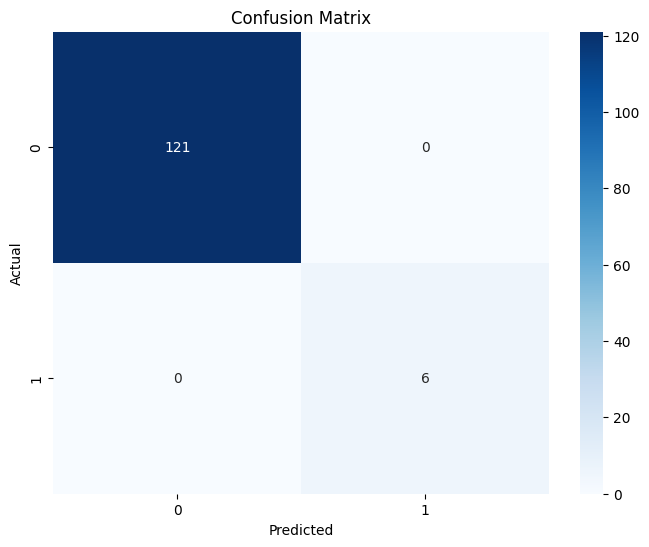

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:07:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00         6

    accuracy                           1.00       127
   macro avg       1.00      1.00      1.00       127
weighted avg       1.00      1.00      1.00       127



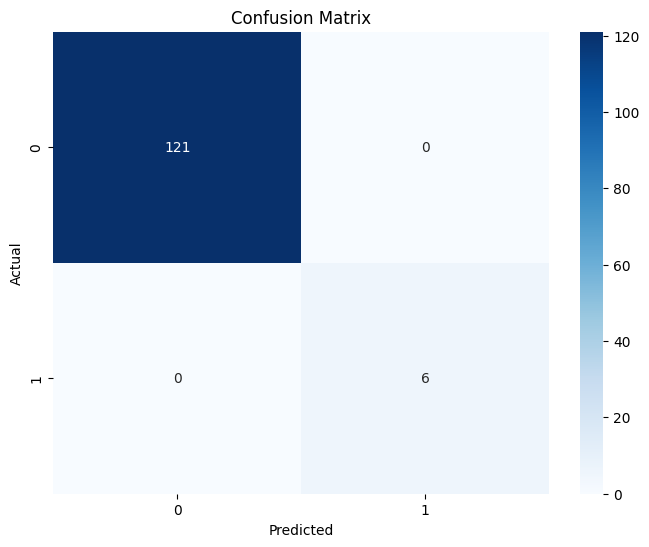

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:07:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       119
           1       1.00      1.00      1.00         8

    accuracy                           1.00       127
   macro avg       1.00      1.00      1.00       127
weighted avg       1.00      1.00      1.00       127



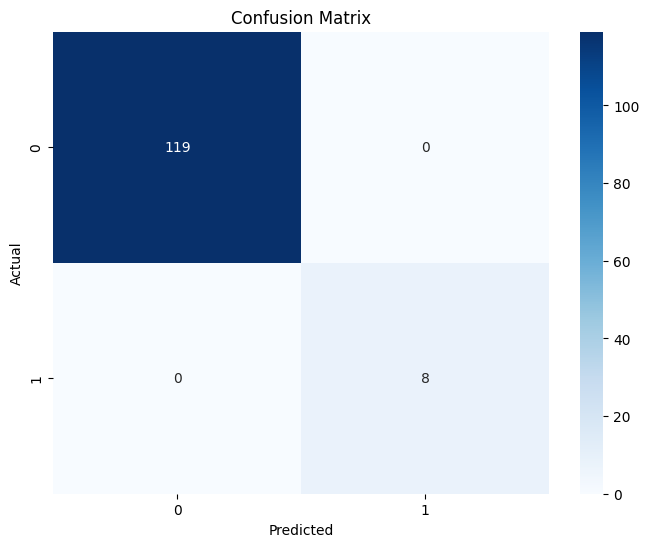

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:07:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       126
           1       1.00      1.00      1.00         1

    accuracy                           1.00       127
   macro avg       1.00      1.00      1.00       127
weighted avg       1.00      1.00      1.00       127



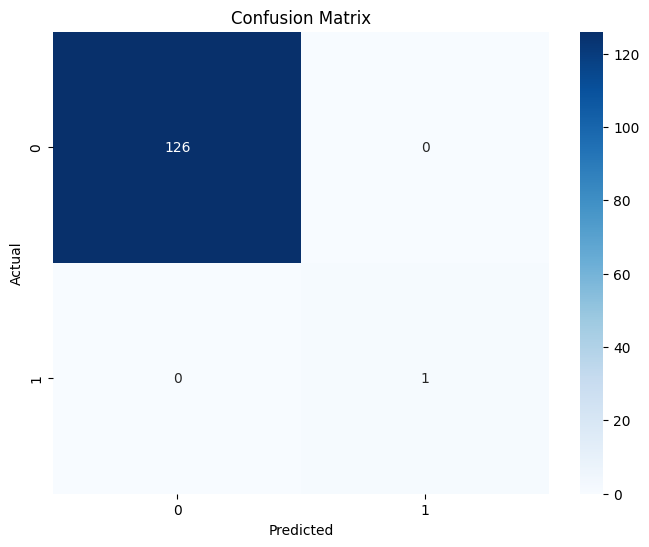

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:07:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       126
           1       1.00      1.00      1.00         1

    accuracy                           1.00       127
   macro avg       1.00      1.00      1.00       127
weighted avg       1.00      1.00      1.00       127



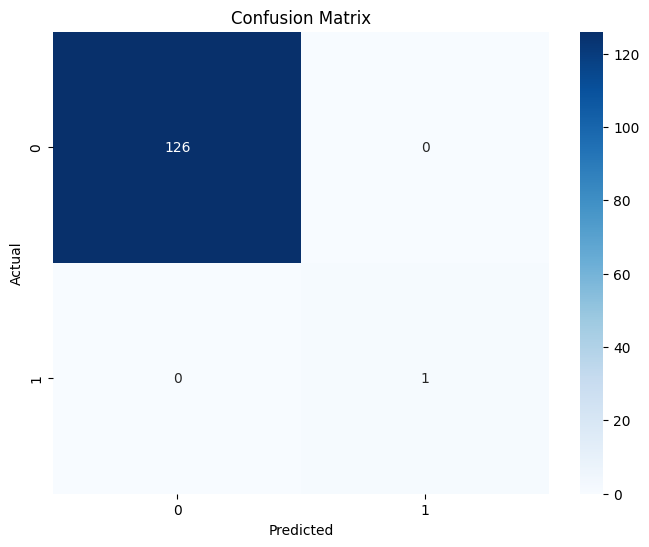

,Player,Team,Batting_Level,Bowling_Level,Fielding_Level,Predicted_Role,Batter_Confidence,Bowler_Confidence,Fielder_Confidence,AllRounder_Confidence,Wicketkeeper_Confidence
0,Sam Sabharwal,Windsor Tigers CC,6,4,5,Fielder,0.959744,0.003056,0.966508,0.021873,0.878936
1,Imran Khan,Chatham CC,6,5,4,Bowler,0.959744,0.979086,0.004430,0.888972,0.022839
2,Rama Tarun Ganne,Windsor Royals CC,6,2,6,Fielder,0.959744,0.001836,0.966508,0.021873,0.878936
3,Sahil Sharma,Windsor Royals CC,6,5,4,Bowler,0.959744,0.979086,0.004430,0.888972,0.022839
4,Karamjit Sohal,WEUnited CC,5,6,4,Bowler,0.959744,0.979086,0.004430,0.888972,0.022839
...,...,...,...,...,...,...,...,...,...,...,...
626,Harsh Patel,Windsor Dominion CC,2,2,1,Bowler,0.001575,0.001836,0.001685,0.000849,0.000963
627,Sahil Vichari,Vulcans CC,2,2,2,Bowler,0.001575,0.001836,0.001685,0.000849,0.000963
628,Mandeep S,EOCC,2,2,2,Bowler,0.001575,0.001836,0.001685,0.000849,0.000963
629,Hatim Bhatti,Alpha XI,2,2,1,Bowler,0.001575,0.001836,0.001685,0.000849,0.000963


In [ ]:


import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("/content/final_cricket_levels.csv")

# Define labels for each role based on thresholds
df["Batter"] = (df["Batting_Level"] >= 5).astype(int)
df["Bowler"] = (df["Bowling_Level"] >= 5).astype(int)
df["Fielder"] = (df["Fielding_Level"] >= 5).astype(int)
df["All-Rounder"] = ((df["Batting_Level"] >= 5) & (df["Bowling_Level"] >= 5)).astype(int)
df["Wicketkeeper"] = ((df["Batting_Level"] >= 5) & (df["Fielding_Level"] >= 5)).astype(int)

# Features for training
X = df[["Batting_Level", "Bowling_Level", "Fielding_Level"]]

# Function to train and predict with XGBoost
def train_xgboost(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    preds = model.predict_proba(X)[:, 1]
    return model, preds

# Train classifiers and print evaluation metrics
_, df["Batter_Confidence"] = train_xgboost(X, df["Batter"])
_, df["Bowler_Confidence"] = train_xgboost(X, df["Bowler"])
_, df["Fielder_Confidence"] = train_xgboost(X, df["Fielder"])
_, df["AllRounder_Confidence"] = train_xgboost(X, df["All-Rounder"])
_, df["Wicketkeeper_Confidence"] = train_xgboost(X, df["Wicketkeeper"])

# Select highest confidence role for each player
role_columns = ["Batter_Confidence", "Bowler_Confidence", "Fielder_Confidence", "AllRounder_Confidence", "Wicketkeeper_Confidence"]
df["Predicted_Role"] = df[role_columns].idxmax(axis=1).str.replace("_Confidence", "")

# Keep relevant columns
final_df = df[["Player", "Team", "Batting_Level", "Bowling_Level", "Fielding_Level", "Predicted_Role"] + role_columns]

# Save to CSV
final_df.to_csv("confidence_intervals.csv", index=False)

# Display output
final_df


Accuracy: 0.9606299212598425
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       121
           1       1.00      0.17      0.29         6

    accuracy                           0.96       127
   macro avg       0.98      0.58      0.63       127
weighted avg       0.96      0.96      0.95       127



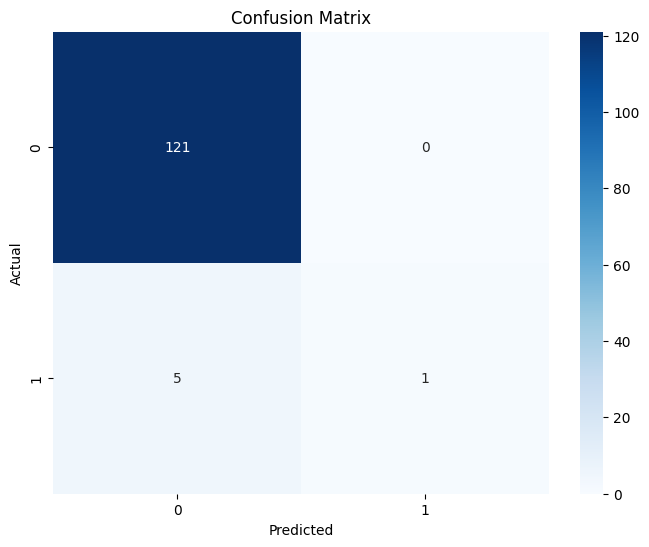

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00         6

    accuracy                           1.00       127
   macro avg       1.00      1.00      1.00       127
weighted avg       1.00      1.00      1.00       127



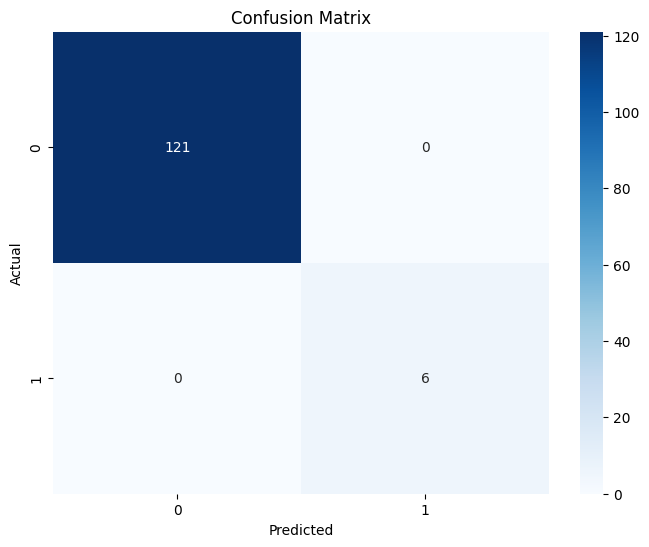

Accuracy: 0.9921259842519685
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       119
           1       1.00      0.88      0.93         8

    accuracy                           0.99       127
   macro avg       1.00      0.94      0.96       127
weighted avg       0.99      0.99      0.99       127



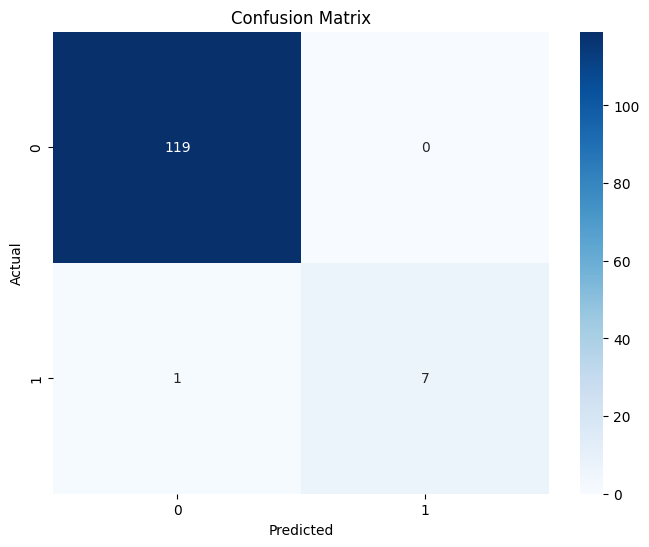

Accuracy: 0.9921259842519685
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       126
           1       0.00      0.00      0.00         1

    accuracy                           0.99       127
   macro avg       0.50      0.50      0.50       127
weighted avg       0.98      0.99      0.99       127



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


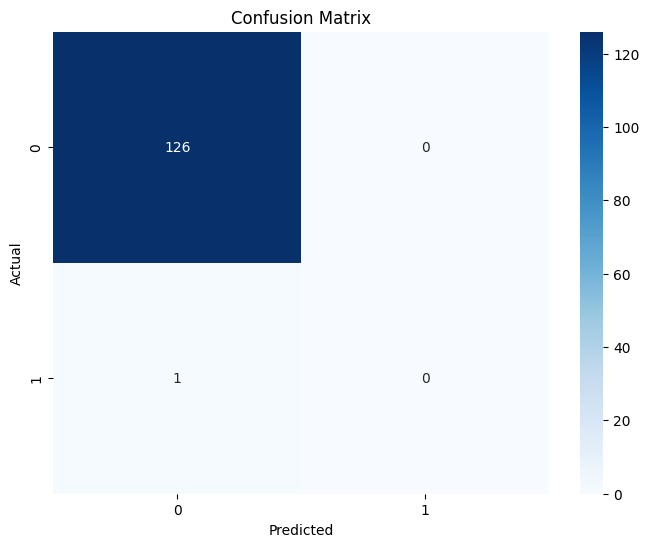

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       126
           1       1.00      1.00      1.00         1

    accuracy                           1.00       127
   macro avg       1.00      1.00      1.00       127
weighted avg       1.00      1.00      1.00       127



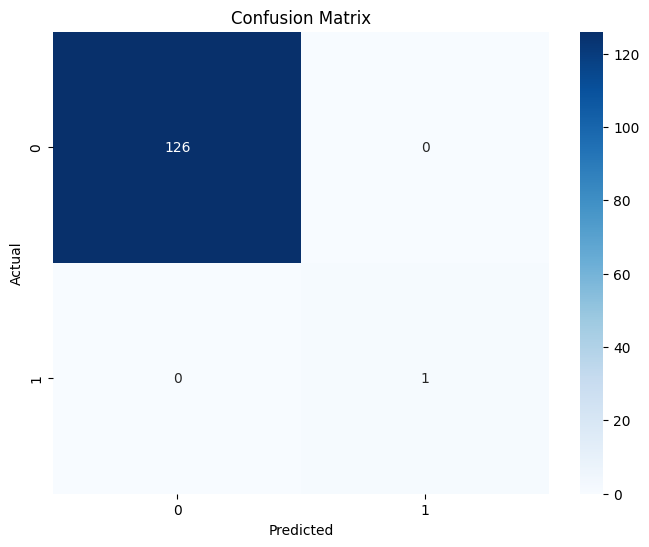

In [ ]:


import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# ... (Your existing code) ...

# Function to train and predict with Logistic Regression and print evaluation metrics
def train_logistic_regression(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LogisticRegression(solver='liblinear') # Use liblinear solver for small datasets
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    preds = model.predict_proba(X)[:, 1]
    return model, preds

# Train classifiers and print evaluation metrics
_, df["Batter_Confidence"] = train_logistic_regression(X, df["Batter"])
_, df["Bowler_Confidence"] = train_logistic_regression(X, df["Bowler"])
_, df["Fielder_Confidence"] = train_logistic_regression(X, df["Fielder"])
_, df["AllRounder_Confidence"] = train_logistic_regression(X, df["All-Rounder"])
_, df["Wicketkeeper_Confidence"] = train_logistic_regression(X, df["Wicketkeeper"])




In [ ]:
#Using random forest classifier
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv("final_cricket_levels.csv")

# Define labels for each role based on thresholds
df["Batter"] = (df["Batting_Level"] >= 5).astype(int)
df["Bowler"] = (df["Bowling_Level"] >= 5).astype(int)
df["Fielder"] = (df["Fielding_Level"] >= 5).astype(int)
df["All-Rounder"] = ((df["Batting_Level"] >= 5) & (df["Bowling_Level"] >= 5)).astype(int)
df["Wicketkeeper"] = ((df["Batting_Level"] >= 5) & (df["Fielding_Level"] >= 5)).astype(int)

# Features for training
X = df[["Batting_Level", "Bowling_Level", "Fielding_Level"]]

# Function to train and predict with Random Forest
def train_random_forest(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    preds = rf.predict_proba(X)[:, 1]  # Get probability of being classified
    return rf, preds

# Train classifiers
_, df["Batter_Confidence"] = train_random_forest(X, df["Batter"])
_, df["Bowler_Confidence"] = train_random_forest(X, df["Bowler"])
_, df["Fielder_Confidence"] = train_random_forest(X, df["Fielder"])
_, df["AllRounder_Confidence"] = train_random_forest(X, df["All-Rounder"])
_, df["Wicketkeeper_Confidence"] = train_random_forest(X, df["Wicketkeeper"])

# Select highest confidence role for each player
role_columns = ["Batter_Confidence", "Bowler_Confidence", "Fielder_Confidence", "AllRounder_Confidence", "Wicketkeeper_Confidence"]
df["Predicted_Role"] = df[role_columns].idxmax(axis=1).str.replace("_Confidence", "")

# Keep relevant columns
final_df = df[["Player", "Team", "Batting_Level", "Bowling_Level", "Fielding_Level", "Predicted_Role"] + role_columns]

#Save to CSV
# final_df.to_csv("confidence_intervals.csv", index=False)

final_df


In [ ]:
# Define the number of players needed for each role
num_batters = 3
num_bowlers = 4
num_fielders = 2
num_allrounders = 1
num_wicketkeepers = 1

# Sorting by confidence intervals for each role
batters_sorted = final_df[['Player', 'Team', 'Batter_Confidence']].sort_values(by='Batter_Confidence', ascending=False).head(num_batters)
bowlers_sorted = final_df[['Player', 'Team', 'Bowler_Confidence']].sort_values(by='Bowler_Confidence', ascending=False).head(num_bowlers)
fielders_sorted = final_df[['Player', 'Team', 'Fielder_Confidence']].sort_values(by='Fielder_Confidence', ascending=False).head(num_fielders)
allrounders_sorted = final_df[['Player', 'Team', 'AllRounder_Confidence']].sort_values(by='AllRounder_Confidence', ascending=False).head(num_allrounders)
wicketkeepers_sorted = final_df[['Player', 'Team', 'Wicketkeeper_Confidence']].sort_values(by='Wicketkeeper_Confidence', ascending=False).head(num_wicketkeepers)

# Combine the sorted results into the final Dream 11 team
dream_11_team = pd.concat([batters_sorted, bowlers_sorted, fielders_sorted, allrounders_sorted, wicketkeepers_sorted])

# Store the final Dream 11 team to a CSV file
dream_11_team.to_csv('dream_11_team.csv', index=False)

print("Dream 11 team saved to 'dream_11_team.csv'")